# Assignment 2 - Jorge Clavijo

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../../Exercise_4_Text_classification/Pakistani Traffic sentiment Analysis.csv')

# Define the three vectorizers
vectorizers = {
    'CountVectorizer': CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20),
    'HashingVectorizer': HashingVectorizer(ngram_range=(1, 2), n_features=200),
    'TfidfVectorizer': TfidfVectorizer(min_df=20, norm='l2', smooth_idf=True, use_idf=True, ngram_range=(1, 1), stop_words='english')
}

# Define the models and their hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=0), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    'Random Forest': (RandomForestClassifier(random_state=0, n_jobs=-1), {'n_estimators': [100, 200, 300, 500], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'XGBoost': (XGBClassifier(eval_metric='logloss', n_jobs=-1), {'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}),
    'Support Vector Machine': (SVC(probability=True), {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}),
    'Naive Bayes': (BernoulliNB(), {'alpha': [0.1, 0.5, 1]})
}

In [22]:
def save_confusion_matrix_with_metrics(model, X_test, y_test, vec_name, model_name, metrics):
    """This function is to export the confusion matrix to a .png file"""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Display confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Positive', 'Negative'], cmap='Blues', xticks_rotation='vertical', ax=ax)
    plt.title(f'Confusion Matrix - {model_name}')
    
    # Format metrics for display
    metrics_text = '\n'.join([
        f'{key}:\n{value}' if isinstance(value, dict) else f'{key}: {value:.4f}' if isinstance(value, float) else f'{key}: {value}'
        for key, value in metrics.items()
    ])
    
    # Add metrics next to the confusion matrix
    plt.text(1.3, 0.5, metrics_text, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    # Save the figure
    image_path = f'{vec_name}-{model_name}_confusion_matrix_with_metrics.png'
    plt.savefig(image_path, format='png', bbox_inches='tight')
    plt.show()
    plt.close()


Using Vectorizer: CountVectorizer

Training model: Logistic Regression


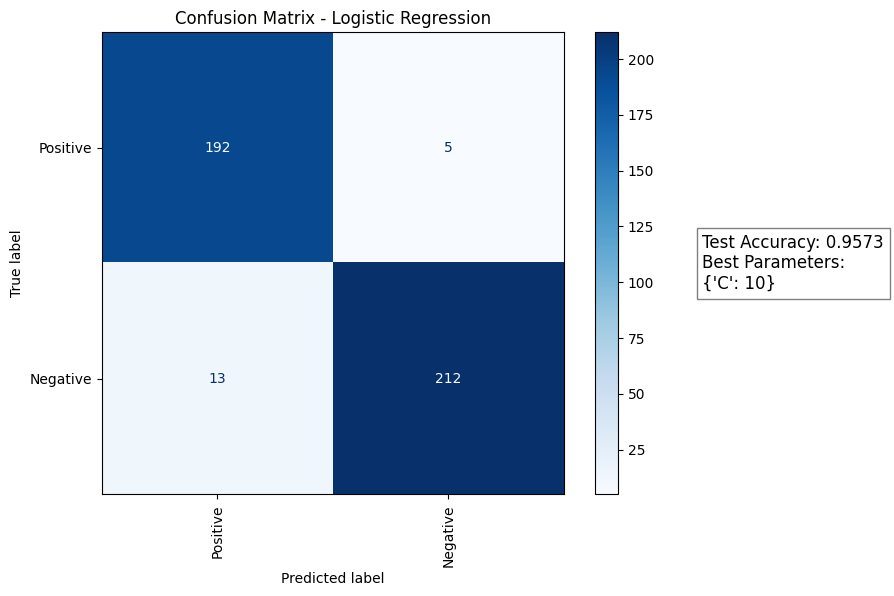


Training model: K-Nearest Neighbors


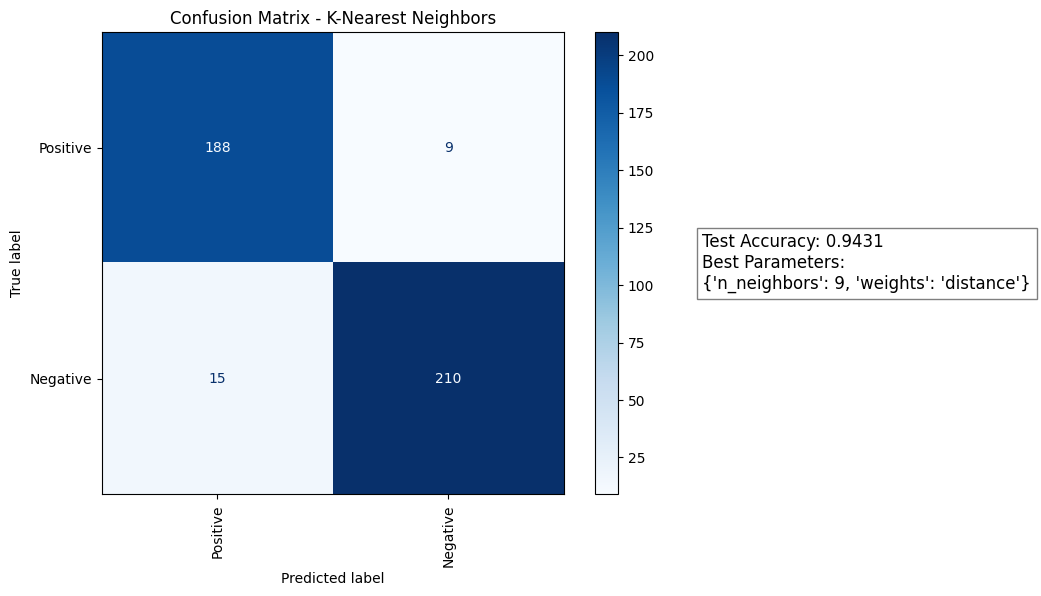


Training model: Random Forest


C:\Users\jecla\Documents\Applied-AI-in-Transportation\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


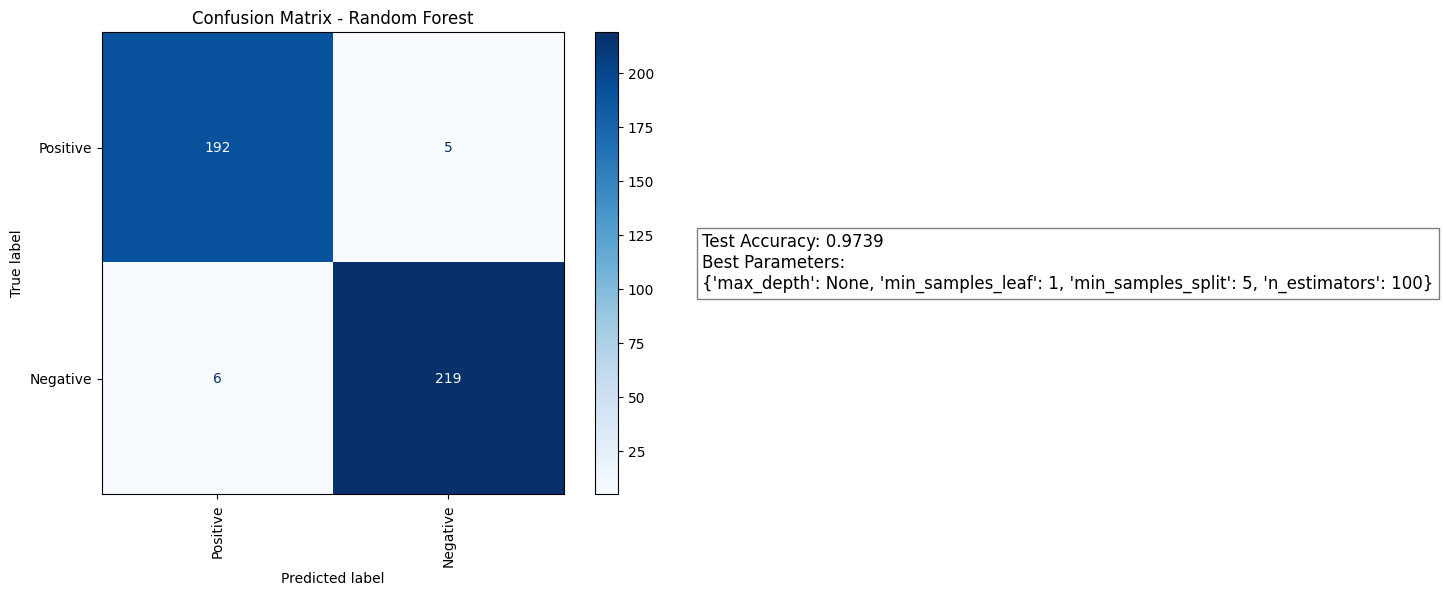


Training model: XGBoost


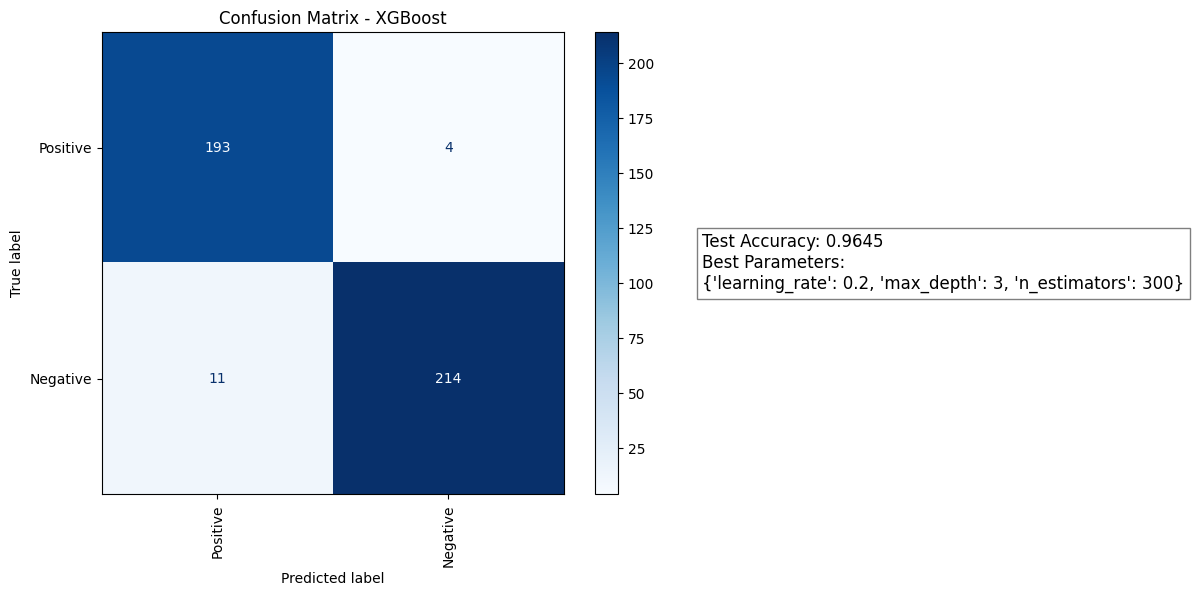


Training model: Support Vector Machine


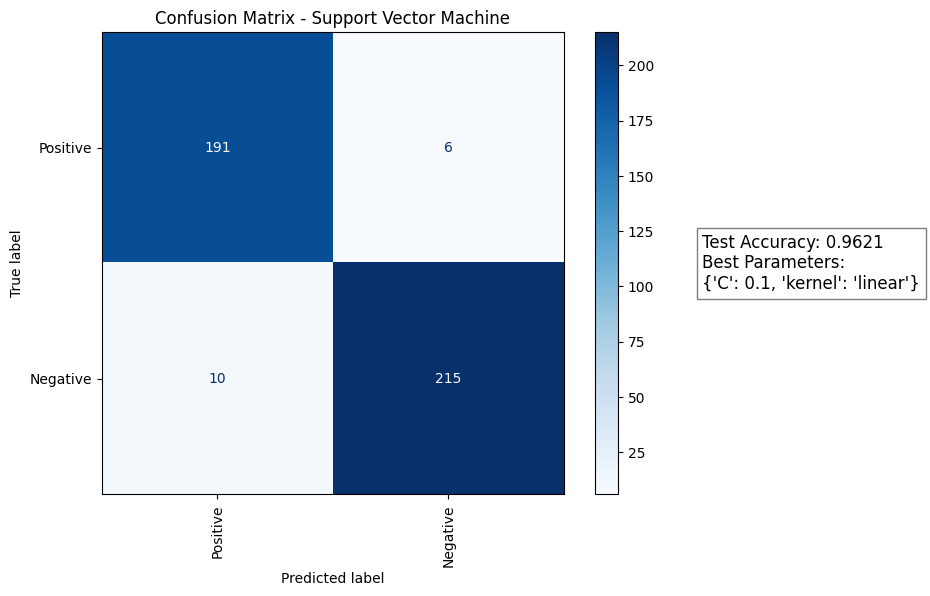


Training model: Naive Bayes


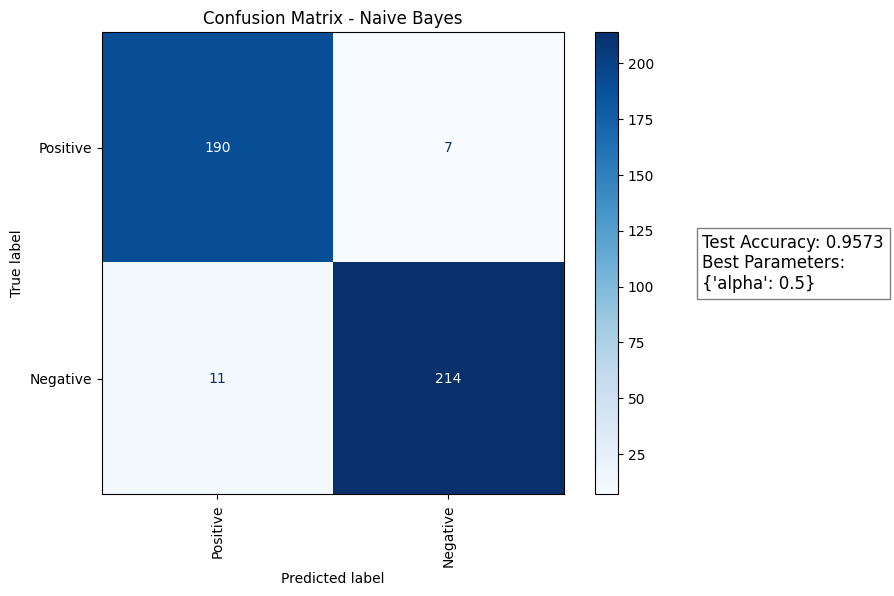


Using Vectorizer: HashingVectorizer

Training model: Logistic Regression


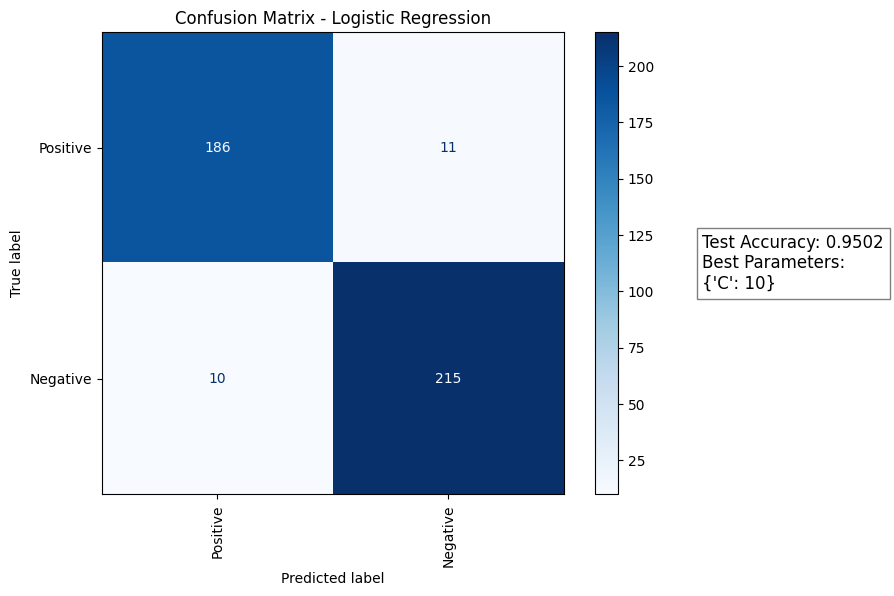


Training model: K-Nearest Neighbors


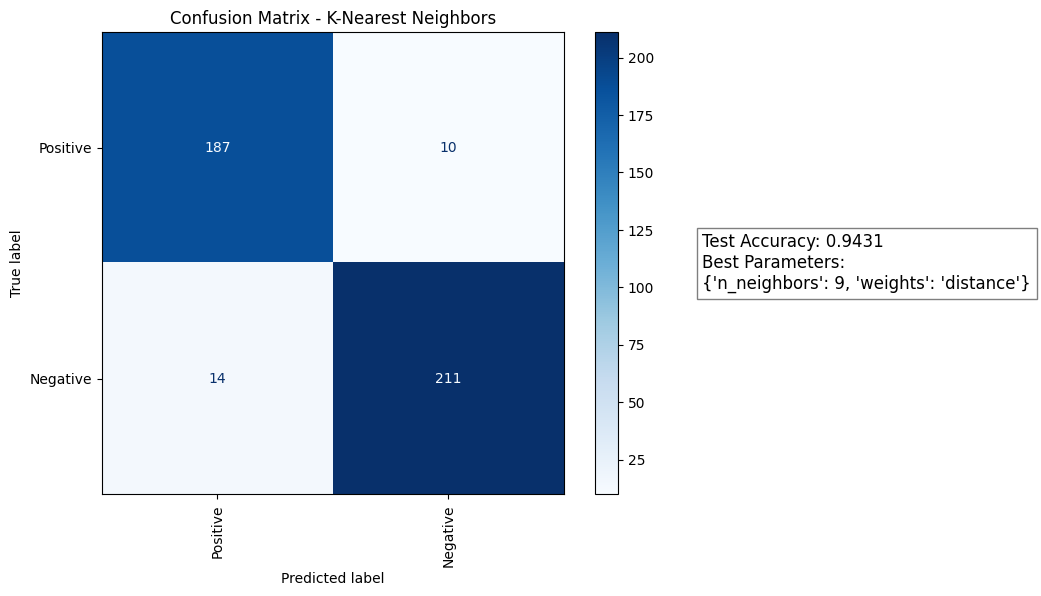


Training model: Random Forest


C:\Users\jecla\Documents\Applied-AI-in-Transportation\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


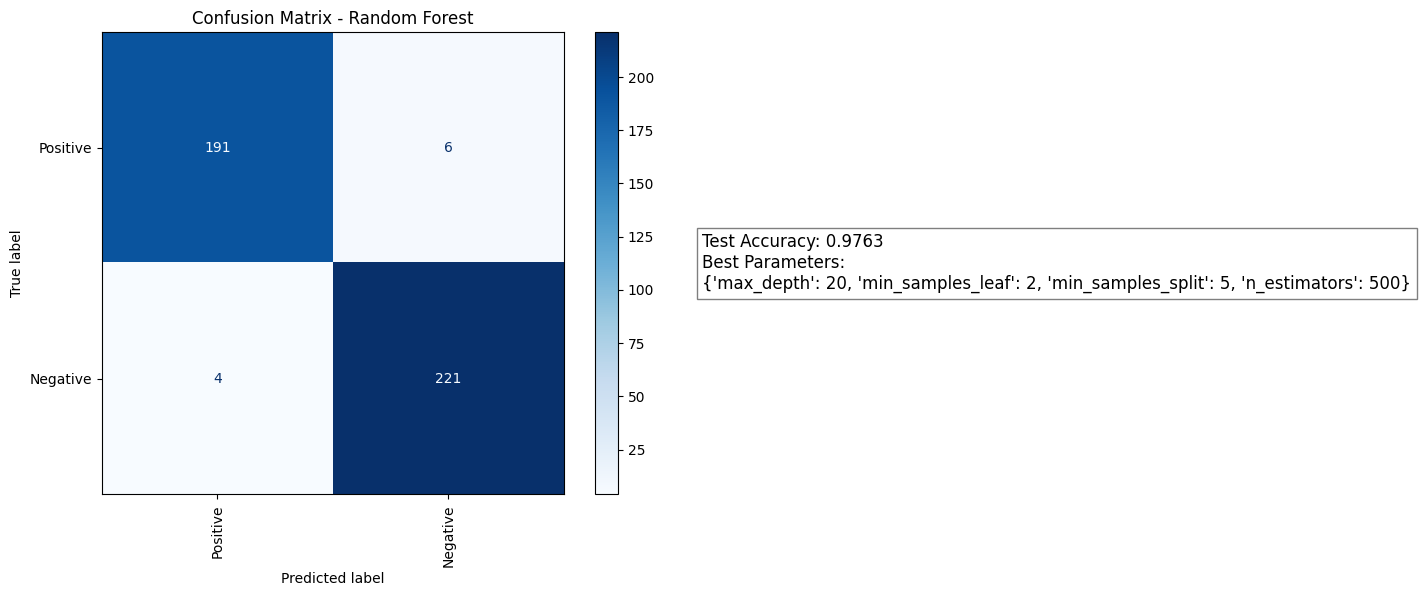


Training model: XGBoost


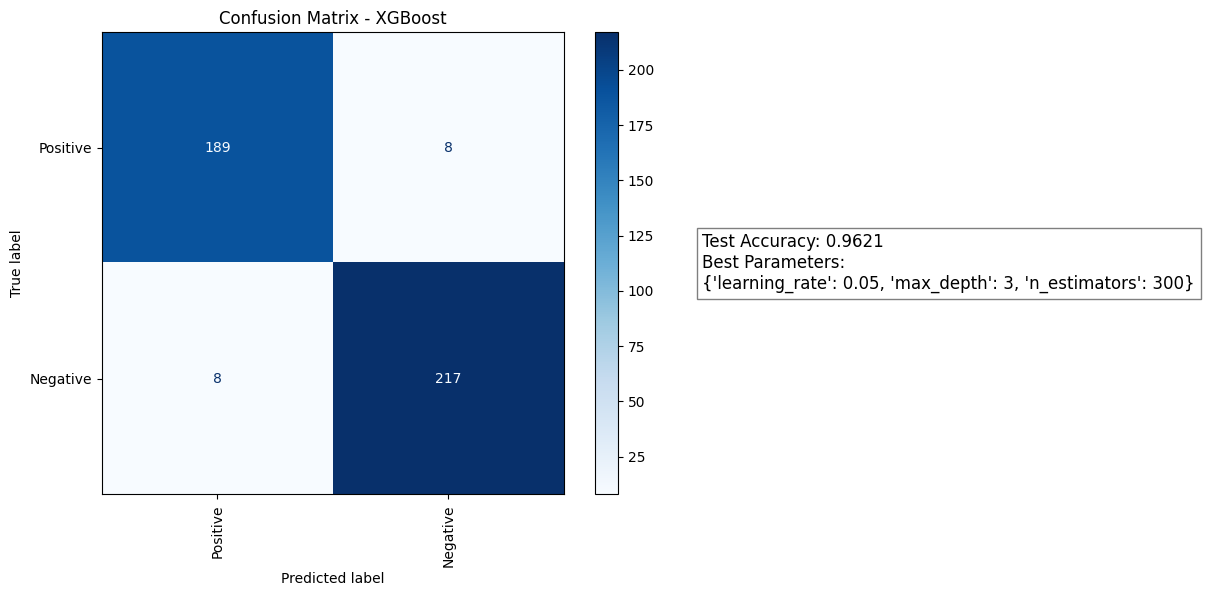


Training model: Support Vector Machine


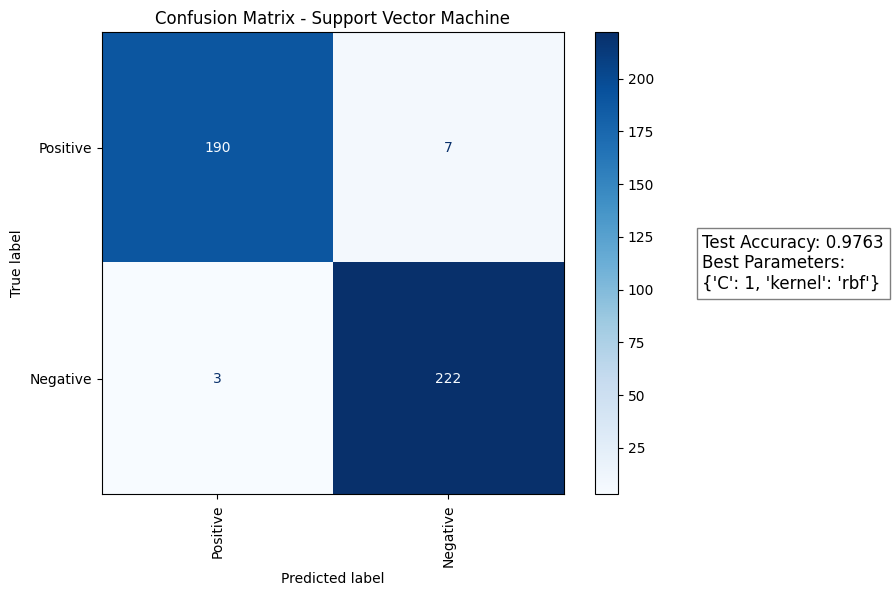


Training model: Naive Bayes


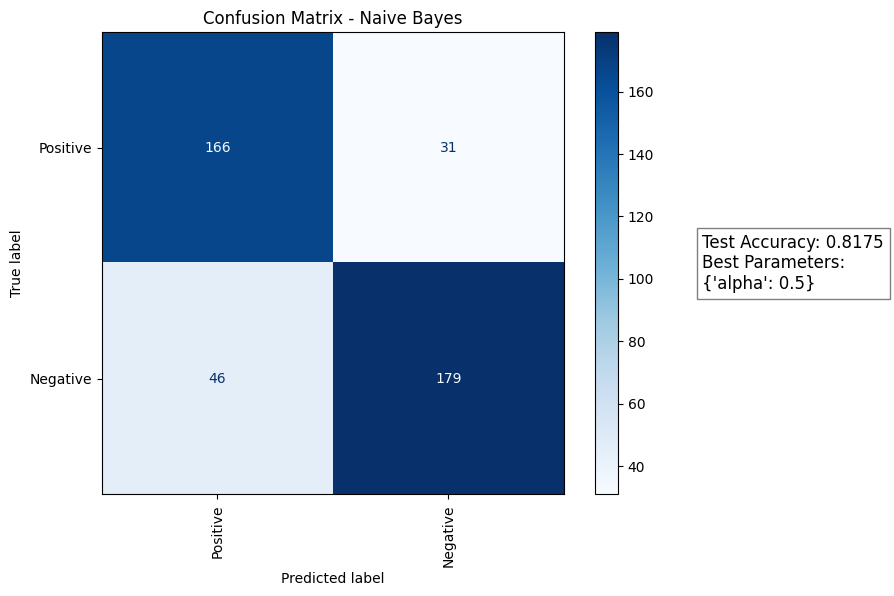


Using Vectorizer: TfidfVectorizer

Training model: Logistic Regression


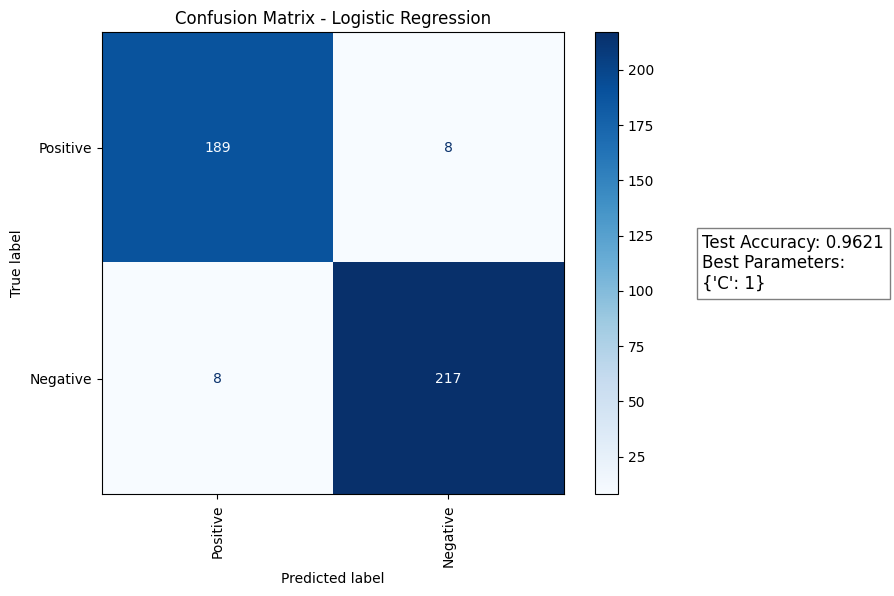


Training model: K-Nearest Neighbors


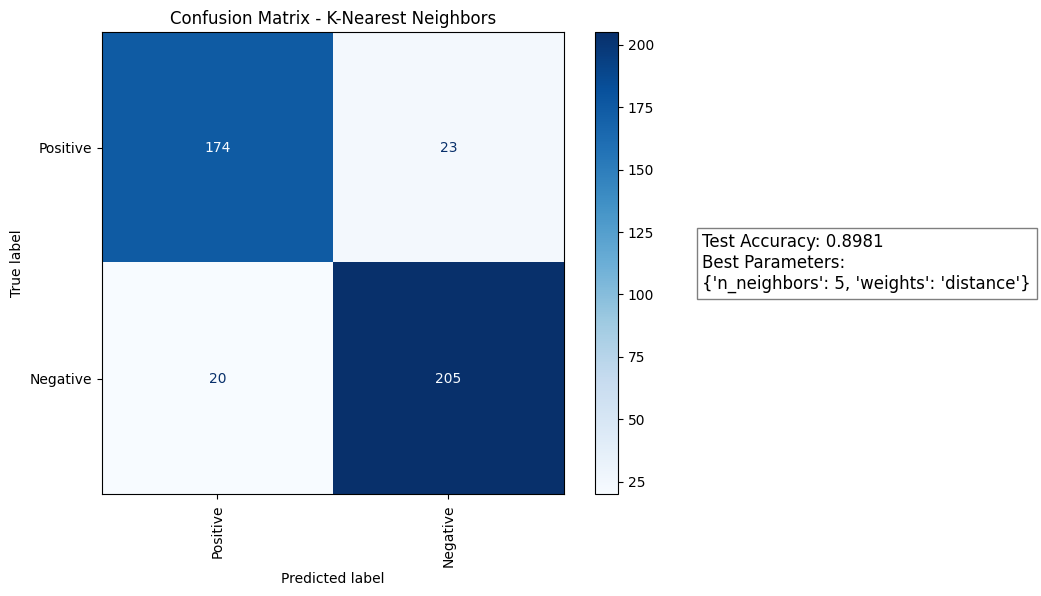


Training model: Random Forest


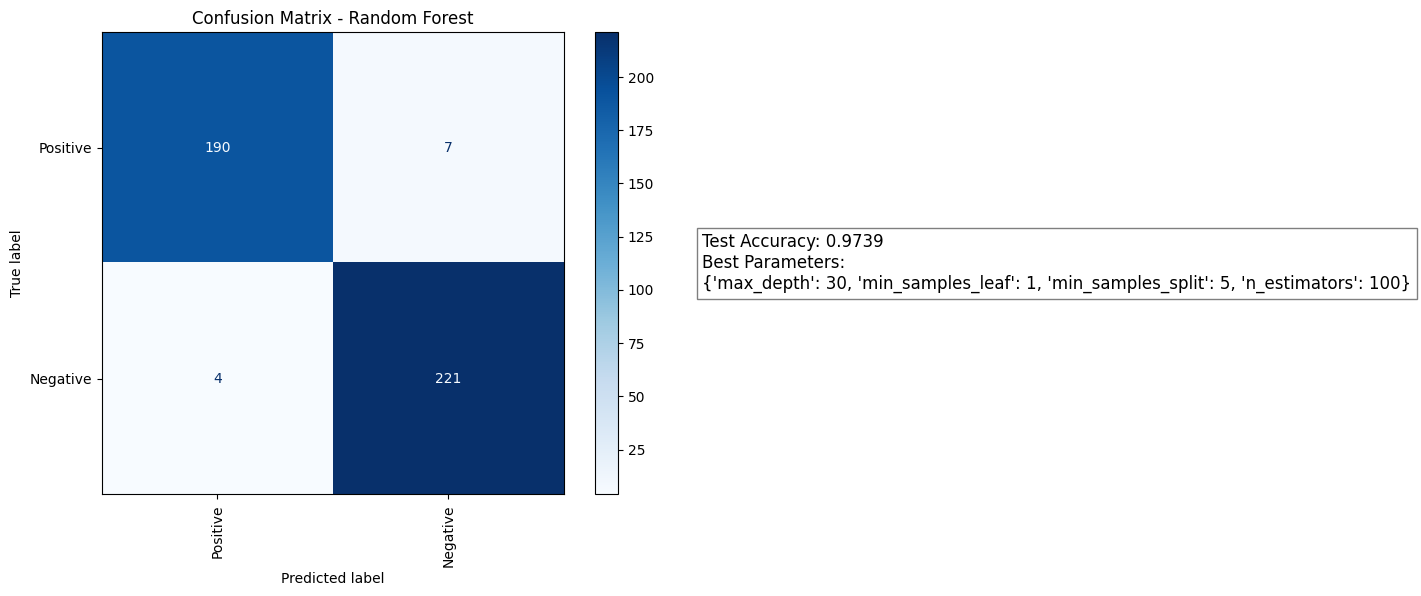


Training model: XGBoost


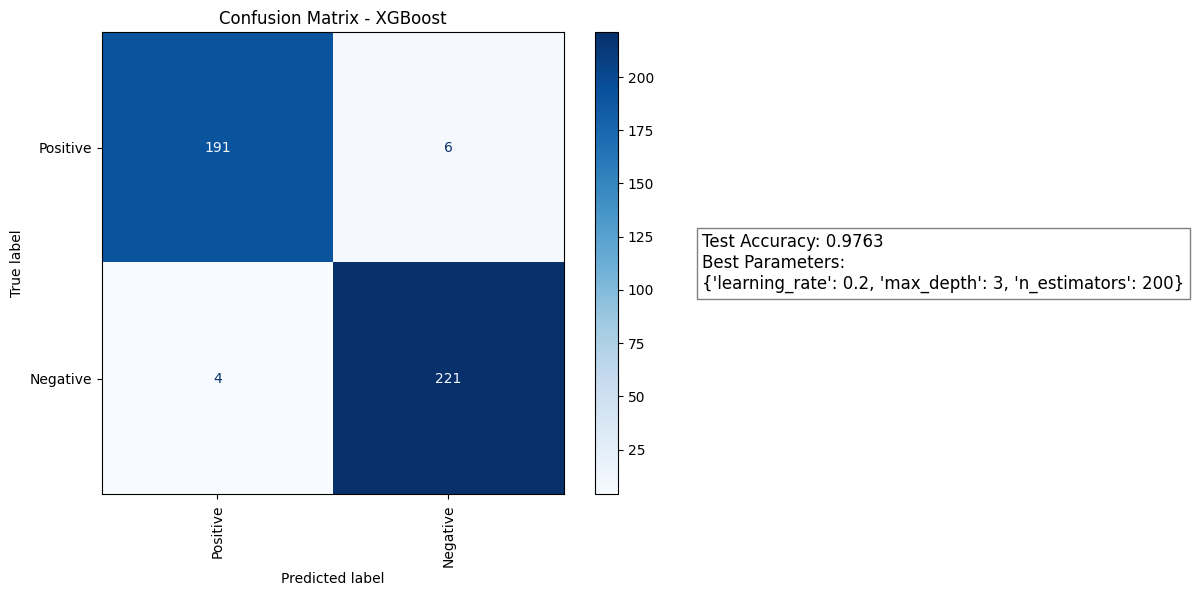


Training model: Support Vector Machine


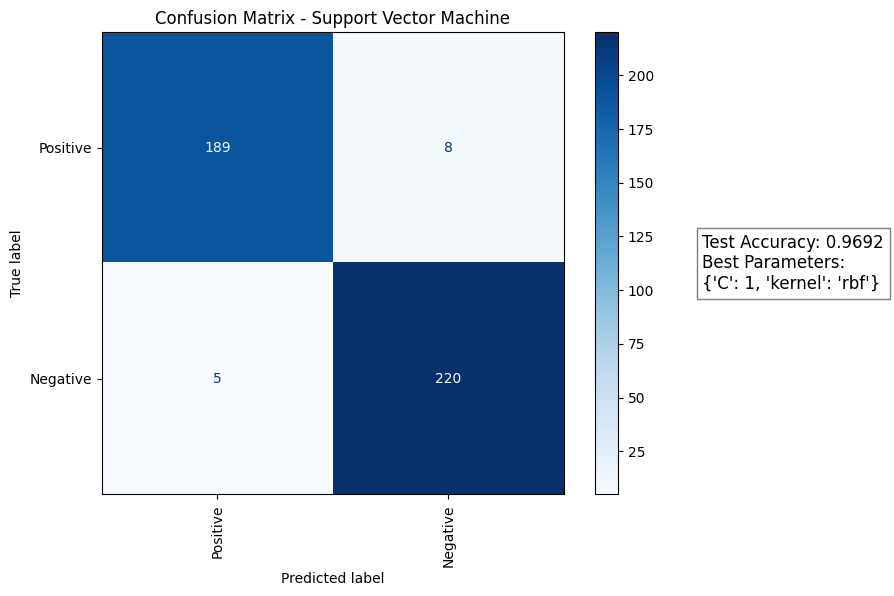


Training model: Naive Bayes


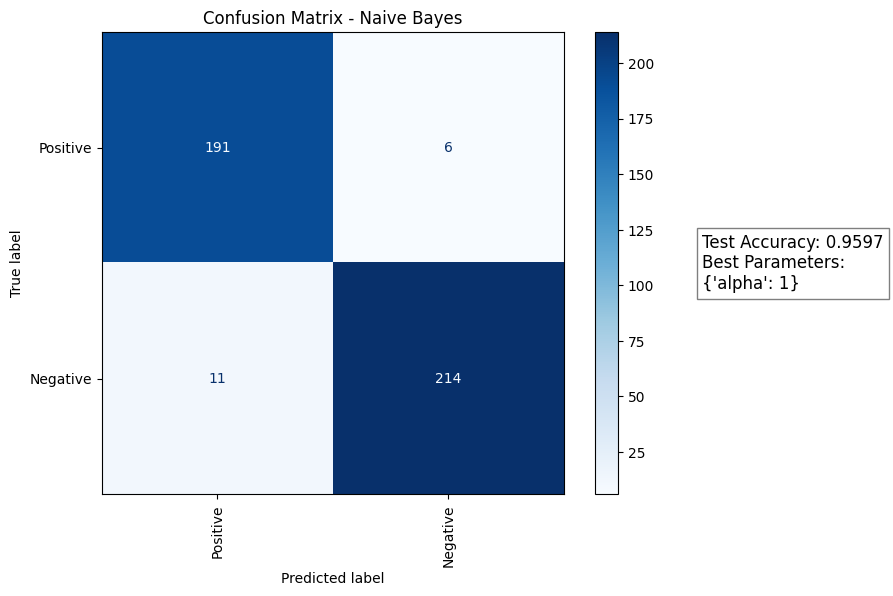

In [23]:
#Trying vectorizer-model combinations

results = []

# Iterate over each vectorizer
for vec_name, vectorizer in vectorizers.items():
    print(f"\nUsing Vectorizer: {vec_name}")
    
    # Transform text data
    X = vectorizer.fit_transform(df['Text'])
    y = df['Sentiment']
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Iterate over each model
    for model_name, (model, param_grid) in models.items():
        print(f"\nTraining model: {model_name}")
        
        # Perform hyperparameter search with GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Get the best model and its parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        # Make predictions on the test set
        y_pred = best_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        metrics = {
            'Test Accuracy': accuracy,
            'Best Parameters': best_params
        }
        
        #Calculate confusion matrix to append to the summary table
        cm = confusion_matrix(y_test, y_pred)
        PP, PN, NP, NN = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
        
        #Retrives the confusion matrix in png format
        save_confusion_matrix_with_metrics(best_model, X_test, y_test, vec_name, model_name, metrics)
        
        # Store results for the summary table
        results.append({
            'Vectorizer': vec_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'Confusion Matrix': f'PP: {PP}, PN: {PN}, NP: {NP}, NN: {NN}',
            'Best Parameters': best_params
        })

In [24]:
# Create Summary Table
results_df = pd.DataFrame(results)
results_df

,Vectorizer,Model,Accuracy,Confusion Matrix,Best Parameters
0,CountVectorizer,Logistic Regression,0.957346,"PP: 192, PN: 5, NP: 13, NN: 212",{'C': 10}
1,CountVectorizer,K-Nearest Neighbors,0.943128,"PP: 188, PN: 9, NP: 15, NN: 210","{'n_neighbors': 9, 'weights': 'distance'}"
2,CountVectorizer,Random Forest,0.973934,"PP: 192, PN: 5, NP: 6, NN: 219","{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
3,CountVectorizer,XGBoost,0.964455,"PP: 193, PN: 4, NP: 11, NN: 214","{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."
4,CountVectorizer,Support Vector Machine,0.962085,"PP: 191, PN: 6, NP: 10, NN: 215","{'C': 0.1, 'kernel': 'linear'}"
5,CountVectorizer,Naive Bayes,0.957346,"PP: 190, PN: 7, NP: 11, NN: 214",{'alpha': 0.5}
6,HashingVectorizer,Logistic Regression,0.950237,"PP: 186, PN: 11, NP: 10, NN: 215",{'C': 10}
7,HashingVectorizer,K-Nearest Neighbors,0.943128,"PP: 187, PN: 10, NP: 14, NN: 211","{'n_neighbors': 9, 'weights': 'distance'}"
8,HashingVectorizer,Random Forest,0.976303,"PP: 191, PN: 6, NP: 4, NN: 221","{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
9,HashingVectorizer,XGBoost,0.962085,"PP: 189, PN: 8, NP: 8, NN: 217","{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
